<a href="https://colab.research.google.com/github/Imran-co/Imran/blob/main/Project_Test_with_Output_using_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install scikit-learn
!pip install joblib # Directly import joblib
import cv2
import numpy as np
from scipy import misc
#from sklearn.externals import joblib # Remove this line
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import pandas as pd

# ... (rest of your code) ...

# joblib.dump(lr, filename)  # This line remains the same

In [12]:
!python --version

Python 3.11.11


In [14]:
# Install required libraries (Only in Jupyter notebook or Python environment)
!pip install scikit-learn
!pip install joblib

import cv2
import numpy as np
import joblib  # Directly import joblib
from sklearn.linear_model import LogisticRegression
import os
import matplotlib.pyplot as plt  # For displaying images in Colab

# Initialize logistic regression model and variables
i = 0
lr = LogisticRegression(max_iter=10000)  # Increase max_iter for better convergence
train = []
kernel = np.ones((3, 3), np.uint8)

label = []
inp = 0

# Function to process images
def im_process(img, inp):
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Thresholding
    _, img1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

    # Dilation
    img1 = cv2.dilate(img1, kernel, iterations=1)

    # Contour extraction
    img2 = img1.copy()
    contours, _ = cv2.findContours(img2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    print(f"Number of contours found: {len(contours)}")  # Debugging line

    for cnt in contours:
        (x, y, w, h) = cv2.boundingRect(cnt)
        img3 = img1[y:y+h, x:x+w]
        img4 = cv2.resize(img3, (20, 20))  # Resize to 20x20 pixels
        img5 = img4.reshape(-1, 400)  # Flatten the image

        # Add to training data and labels
        train.append(img5)
        label.append(inp)

    print(f"Processed label {inp} with {len(train)} samples.")  # Debugging line
    return None

# Loop through digit images and preprocess
images = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

for image in images:
    filep = os.path.join('Digi_temp', f'{image}.png')
    img = cv2.imread(filep)

    # Check if image is loaded correctly
    if img is None:
        print(f"Error loading image: {filep}")
        continue  # Skip if image is not found

    # Display the image using matplotlib (for Colab compatibility)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Processing {image}")
    plt.show()

    # Process the image for training
    im_process(img, inp)

    inp += 1

# Check if 'train' and 'label' lists are populated before reshaping
if len(train) == 0 or len(label) == 0:
    print("Error: No training data or labels found!")
else:
    # Prepare training data and labels
    tr = np.array(train).reshape(len(train), 400)  # Dynamically reshape based on length of train
    label = np.array(label).reshape(len(label), -1)

    # Train the logistic regression model
    lr.fit(tr, label)

    # Save the trained model
    filename = 'OCR_Log_reg.sav'
    joblib.dump(lr, filename)

    print(f"Model saved to {filename}")


Error loading image: Digi_temp/zero.png
Error loading image: Digi_temp/one.png
Error loading image: Digi_temp/two.png
Error loading image: Digi_temp/three.png
Error loading image: Digi_temp/four.png
Error loading image: Digi_temp/five.png
Error loading image: Digi_temp/six.png
Error loading image: Digi_temp/seven.png
Error loading image: Digi_temp/eight.png
Error loading image: Digi_temp/nine.png
Error: No training data or labels found!


In [15]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /content


In [16]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload files


Saving eight.png to eight (1).png


In [19]:
import os

images = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

for image in images:
    filep = os.path.join('', f'{image}.png')

    # Debugging to check if the file exists
    if os.path.exists(filep):
        print(f"Found file: {filep}")
    else:
        print(f"File not found: {filep}")

Found file: zero.png
Found file: one.png
Found file: two.png
Found file: three.png
Found file: four.png
Found file: five.png
Found file: six.png
Found file: seven.png
Found file: eight.png
Found file: nine.png


Found file: zero.png


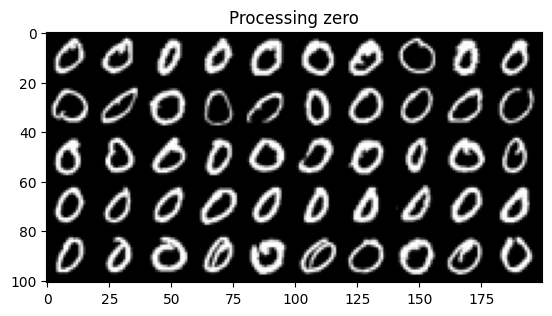

Number of contours found: 50
Processed label 0 with 50 samples.
Found file: one.png


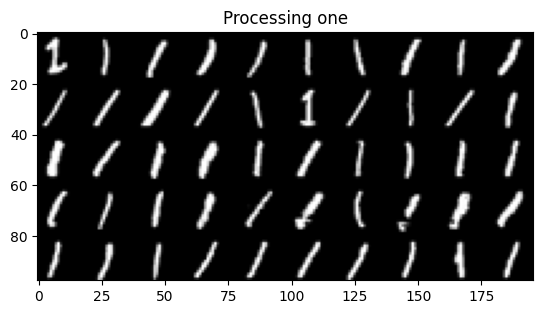

Number of contours found: 50
Processed label 1 with 100 samples.
Found file: two.png


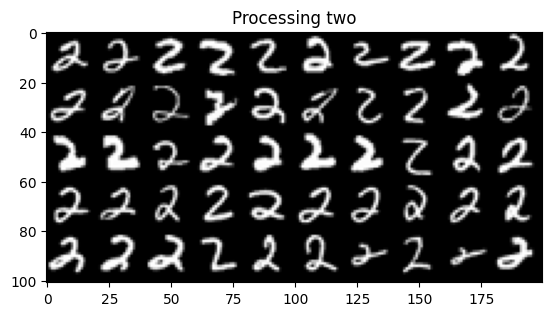

Number of contours found: 50
Processed label 2 with 150 samples.
Found file: three.png


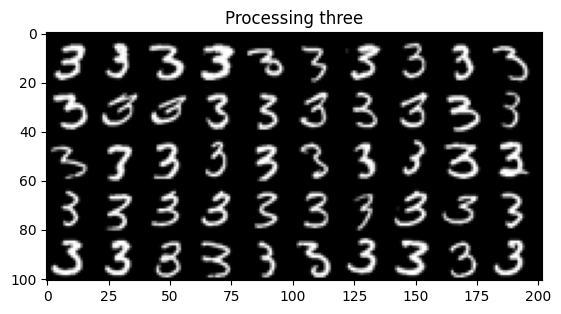

Number of contours found: 50
Processed label 3 with 200 samples.
Found file: four.png


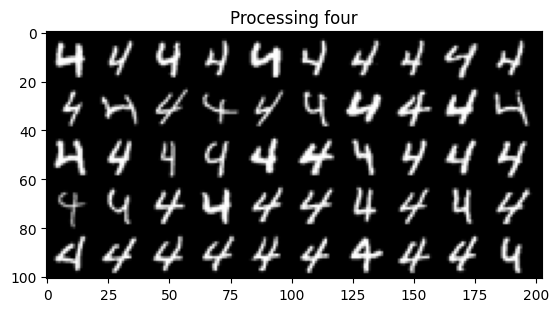

Number of contours found: 50
Processed label 4 with 250 samples.
Found file: five.png


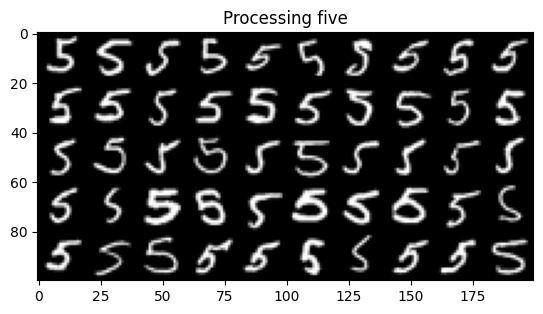

Number of contours found: 50
Processed label 5 with 300 samples.
Found file: six.png


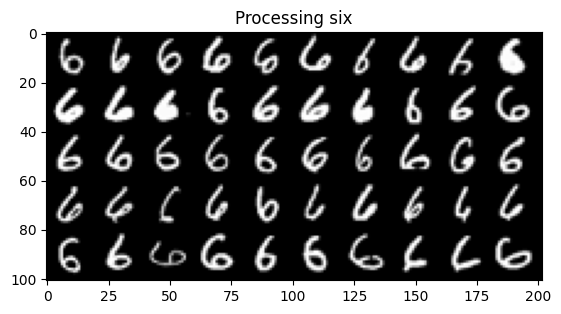

Number of contours found: 50
Processed label 6 with 350 samples.
Found file: seven.png


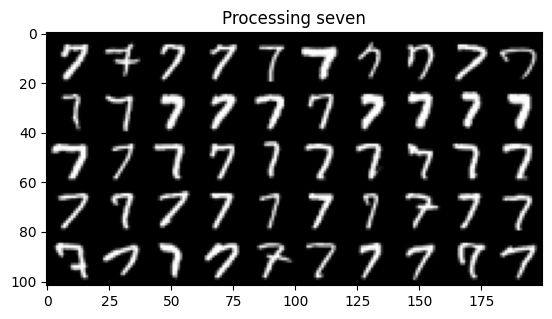

Number of contours found: 50
Processed label 7 with 400 samples.
Found file: eight.png


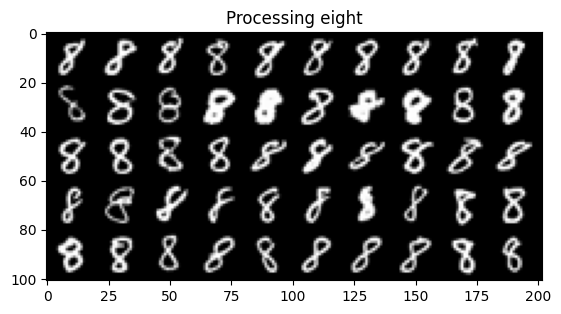

Number of contours found: 50
Processed label 8 with 450 samples.
Found file: nine.png


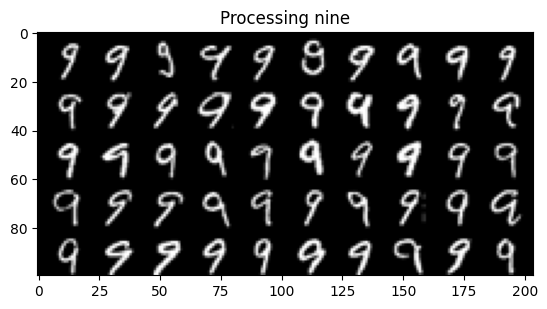

Number of contours found: 50
Processed label 9 with 500 samples.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model saved to OCR_Log_reg.sav


In [28]:
import os
import cv2
import numpy as np
import joblib
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Initialize logistic regression model and variables
i = 0
lr = LogisticRegression(max_iter=10000)
train = []
kernel = np.ones((3, 3), np.uint8)

label = []
inp = 0

# Function to process images
def im_process(img, inp):
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
    img1 = cv2.dilate(img1, kernel, iterations=1)
    img2 = img1.copy()
    contours, _ = cv2.findContours(img2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    print(f"Number of contours found: {len(contours)}")

    for cnt in contours:
        (x, y, w, h) = cv2.boundingRect(cnt)
        img3 = img1[y:y+h, x:x+w]
        img4 = cv2.resize(img3, (20, 20))
        img5 = img4.reshape(-1, 400)
        train.append(img5)
        label.append(inp)

    print(f"Processed label {inp} with {len(train)} samples.")
    return None

# Loop through digit images and preprocess
images = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

for image in images:
    filep = os.path.join('', f'{image}.png')

    # Check if the file exists
    if os.path.exists(filep):
        print(f"Found file: {filep}")
    else:
        print(f"File not found: {filep}")
        continue

    img = cv2.imread(filep)

    # Display the image using matplotlib (for Colab compatibility)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Processing {image}")
    plt.show()

    # Process the image for training
    im_process(img, inp)

    inp += 1

# Check if 'train' and 'label' lists are populated before reshaping
if len(train) == 0 or len(label) == 0:
    print("Error: No training data or labels found!")
else:
    # Prepare training data and labels
    tr = np.array(train).reshape(len(train), 400)
    label = np.array(label).reshape(len(label), -1)

    # Train the logistic regression model
    lr.fit(tr, label)

    # Save the trained model
    filename = 'OCR_Log_reg.sav'
    joblib.dump(lr, filename)

    print(f"Model saved to {filename}")


In [39]:
import os
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt

# Load the pre-trained Logistic Regression model
filename = 'OCR_Log_reg.sav'
lr = joblib.load(filename)

# Kernel for dilation operation
kernel = np.ones((3, 3), np.uint8)

# Function to process images (same as in training)
def im_process(img):
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
    img1 = cv2.dilate(img1, kernel, iterations=1)
    img2 = img1.copy()
    contours, _ = cv2.findContours(img2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    print(f"Number of contours found: {len(contours)}")

    # Prepare a list for storing processed image data
    processed_images = []

    for cnt in contours:
        (x, y, w, h) = cv2.boundingRect(cnt)
        img3 = img1[y:y+h, x:x+w]
        img4 = cv2.resize(img3, (20, 20))
        img5 = img4.reshape(-1, 400)
        processed_images.append(img5)

    print(f"Processed {len(processed_images)} images for prediction.")

    return processed_images

# Function to load all test images from a folder
def load_test_images(test_folder):
    test_images = []

    # Loop through all files in the folder
    for filename in os.listdir(test_folder):
        # Check if the file is an image (by extension, e.g., .png, .jpg)
        if filename.endswith(('.png','.sav')):
            image_path = os.path.join(test_folder, filename)
            img = cv2.imread(image_path)

            # Process the image for prediction
            processed_images = im_process(img)

            # Append processed images for this file
            test_images.extend(processed_images)  # Add all processed images to the list

    return test_images

# Path to the folder containing test images (update as needed)
test_folder = '/content/test_folder'

# Load all test images from the folder
test_images = load_test_images(test_folder)

# Predict the digits for each image in the test list
for i, img5 in enumerate(test_images):
    prediction = lr.predict(img5)
    print(f"Predicted digit for image {i+1}: {prediction[0]}")





Number of contours found: 50
Processed 50 images for prediction.
Number of contours found: 50
Processed 50 images for prediction.
Predicted digit for image 1: 5
Predicted digit for image 2: 5
Predicted digit for image 3: 5
Predicted digit for image 4: 5
Predicted digit for image 5: 5
Predicted digit for image 6: 5
Predicted digit for image 7: 5
Predicted digit for image 8: 5
Predicted digit for image 9: 5
Predicted digit for image 10: 5
Predicted digit for image 11: 5
Predicted digit for image 12: 5
Predicted digit for image 13: 5
Predicted digit for image 14: 5
Predicted digit for image 15: 5
Predicted digit for image 16: 5
Predicted digit for image 17: 5
Predicted digit for image 18: 5
Predicted digit for image 19: 5
Predicted digit for image 20: 5
Predicted digit for image 21: 5
Predicted digit for image 22: 5
Predicted digit for image 23: 5
Predicted digit for image 24: 5
Predicted digit for image 25: 5
Predicted digit for image 26: 5
Predicted digit for image 27: 5
Predicted digit